**Creating a survival prediction model using data from patients with cardiovascular heart disease (CVD).**

To do this we will follow the following steps:
1. Creating at least 5 unique questions using different types of plots to help understand the data.

2. Creating a test set and a training set using the original dataset.

3. Preparing the data and pipeline for training a few ML classifiers that can predict a binary outcome (survive or dead). Using N-fold cross-validation to evaluate the performance of each classifier.

4. Testing the best ML classifier using the test set.

5. Creating two plots (ROC and precision-recall curve) that will show all the trained ML classifier's performances. And we will select the best one for testing. Also including a confusion matrix to show the performance of the best class ML classifier.

Data description:

*   age: age of the patient (years)
*   anemia: decrease of red blood cells or hemoglobin (boolean)
*   high blood pressure: if the patient has hypertension (boolean)
*   creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
*   diabetes: if the patient has diabetes (boolean)
*   ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
*   platelets: platelets in the blood (kiloplatelets/mL)
*   sex: woman or man (binary)
*   serum creatinine: level of serum creatinine in the blood (mg/dL)
*   serum sodium: level of serum sodium in the blood (mEq/L)
*   smoking: if the patient smokes or not (boolean)
*   time: follow-up period (days)
*   [target] death event: if the patient deceased during the follow-up period (boolean)


**Note:** As per [Table 2](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/2) of [paper](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Tab1), all boolean values in the data indicate 0 as false and 1 as true. In case of sex, 0 is woman and 1 is man.




















**1.   Creating five different types of plots to understand the data**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
patient_data = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C/heart_disease_clinical_data.csv"
patients = pd.read_csv(patient_data)
patients

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# Rename headers for some columns
patients = patients.rename(columns={"creatinine_phosphokinase":"CPK",
                      "high_blood_pressure":"HBP",
                      "DEATH_EVENT":"death"
                       })
patients

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   anaemia            299 non-null    int64  
 2   CPK                299 non-null    int64  
 3   diabetes           299 non-null    int64  
 4   ejection_fraction  299 non-null    int64  
 5   HBP                299 non-null    int64  
 6   platelets          299 non-null    float64
 7   serum_creatinine   299 non-null    float64
 8   serum_sodium       299 non-null    int64  
 9   sex                299 non-null    int64  
 10  smoking            299 non-null    int64  
 11  time               299 non-null    int64  
 12  death              299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# check if there are missing data in each column
patients.isnull().sum()

age                  0
anaemia              0
CPK                  0
diabetes             0
ejection_fraction    0
HBP                  0
platelets            0
serum_creatinine     0
serum_sodium         0
sex                  0
smoking              0
time                 0
death                0
dtype: int64

In [ ]:
#Creating a copy of patient dataframe
new_patients = patients.copy()
new_patients.head(5)

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Function to substitute binary gender values in the new dataframe
def gender(r):
  if r.sex == 0:
    return "Woman"
  else:
    return "Man"

In [ ]:
new_patients["sex"] = new_patients.apply(gender,axis="columns")
new_patients.head(5)

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,Man,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,Man,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,Man,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,Man,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,Woman,0,8,1


Question 1: What effect does CPK have on ejection fraction in CVD patients of all ages?

In [ ]:
new_patients.sex.value_counts()

Man      194
Woman    105
Name: sex, dtype: int64

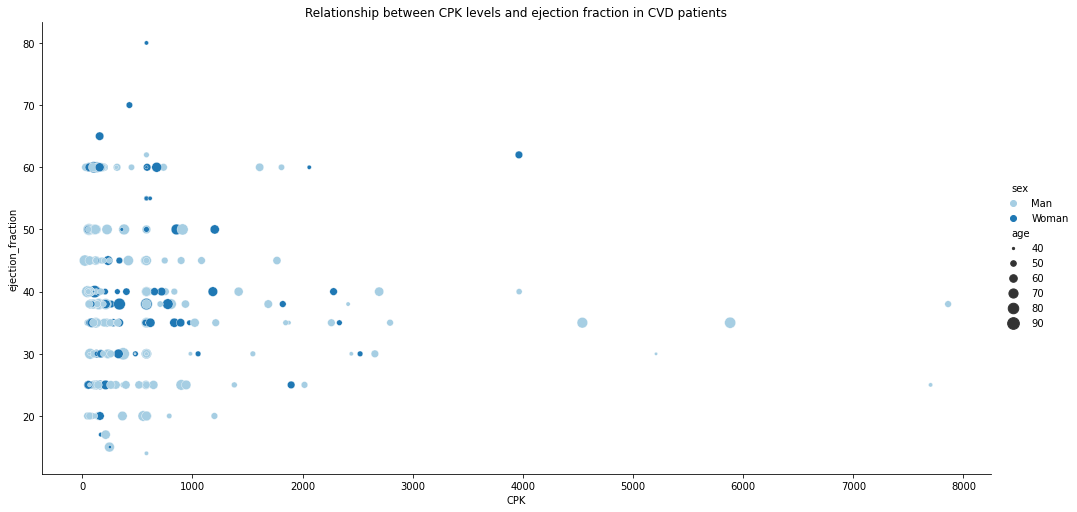

In [ ]:
sns.relplot(
    data=new_patients,
    x="CPK",
    y="ejection_fraction",
    size="age",
    sizes=(5,150),
    height= 7,
    aspect=2,
    hue="sex",
    palette="Paired"
)
plt.title("Relationship between CPK levels and ejection fraction in CVD patients");

High CPK levels are usually seen when there is some damage to the heart. From the plot, we can say that; there are more men compared to women because the data is not proportional. Most men and women have CPK levels within 3000.

More men in the age range of 50-70 have CPK levels close to 600 and ejection fraction in the range of 10-60. Only 5-6 men in the age range of 40-60 have very high CPK levels.

More women in the age range of 40-70 have CPK levels close to 600 and ejection fraction in the range of 15-80. Only one women who is 50 shows  CPK levels of nearly 4000.

Normal CPK levels are said to be in the range of 10-120 mcg/L. According to Mayo Clinic, the normal ejection fraction percentage is 50-75%. Hence, we can say that the high CPK levels tend to decrease the ejection fraction.

Question 2: What is the relationship between high blood pressure and serum sodium levels in smokers and non-smokers with CVD?

In [ ]:
#Function to substitute boolean blood pressure values in the new dataframe
def bp(r):
  if r.HBP == 0:
    return "False"
  else:
    return "True"

In [ ]:
new_patients["HBP"] = new_patients.apply(bp,axis="columns")
new_patients.head(5)

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,True,265000.00,1.9,130,Man,0,4,1
1,55.0,0,7861,0,38,False,263358.03,1.1,136,Man,0,6,1
2,65.0,0,146,0,20,False,162000.00,1.3,129,Man,1,7,1
3,50.0,1,111,0,20,False,210000.00,1.9,137,Man,0,7,1
4,65.0,1,160,1,20,False,327000.00,2.7,116,Woman,0,8,1


In [ ]:
#Function to substitute boolean smoking values in the new dataframe
def smoker(r):
  if r.smoking == 0:
    return "non-smoker"
  else:
    return "smoker"

In [ ]:
new_patients["smoking"] = new_patients.apply(smoker,axis="columns")
new_patients.head(5)

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,True,265000.00,1.9,130,Man,non-smoker,4,1
1,55.0,0,7861,0,38,False,263358.03,1.1,136,Man,non-smoker,6,1
2,65.0,0,146,0,20,False,162000.00,1.3,129,Man,smoker,7,1
3,50.0,1,111,0,20,False,210000.00,1.9,137,Man,non-smoker,7,1
4,65.0,1,160,1,20,False,327000.00,2.7,116,Woman,non-smoker,8,1


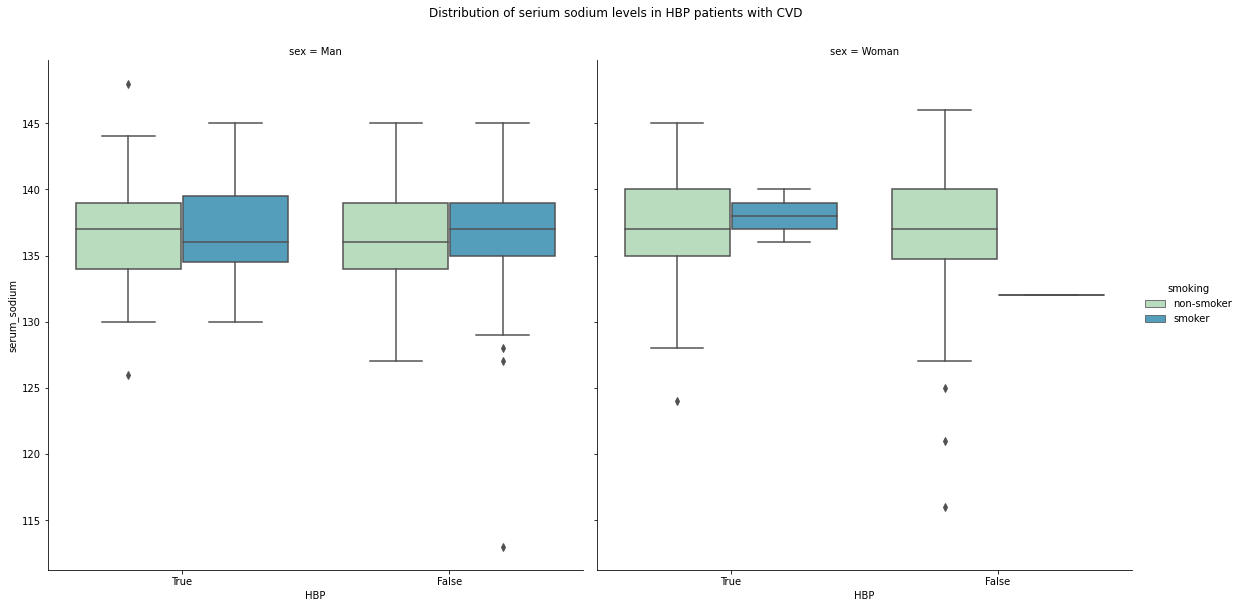

In [ ]:
g=sns.catplot(
    data=new_patients,
    x="HBP",
    y="serum_sodium",
    kind="box",
    hue="smoking",
    height=8,
    palette="GnBu",
    col="sex"
)
g.fig.suptitle("Distribution of serium sodium levels in HBP patients with CVD", y=1.05);

Non-smoking men with HBP have serum sodium levels in the range of 130-144. The median sodium level in non-smoking men is nearly 137/138. There are few outliers in the upper and lower quartile of the plot.

Men who smoke and have HBP, show serum sodium levels in the range of 130-145. Slightly higher than the non-smokers. The median sodium level in smokers is nearly 135 which is slightly lower than non-smokers. But there are comparatively many men who have levels more than 135 till 140.

Non-smoking men without HBP have serum sodium levels in the range of 128-145. The median sodium level in non-smoking men is nearly 136. But most men in this category fall above 135.

Men who smoke but do not have HBP, show serum sodium levels in the range of 127-145. Slightly higher than the non-smokers. The median sodium level in smokers is nearly 137 which is slightly higher than non-smokers. The number of men seem to be evenly distributed in the ranges. Few outliers are present in the lower quartile of the plot.

Overall, smoking seems to affect men with HBP.

Non-smoking women with HBP have serum sodium levels in the range of 128-145. The median sodium level in non-smoking women is nearly 136. There is an outlier in the lower quartile of the plot. Most non-smoking women have ranges above 136.

Women who smoke and have HBP, show serum sodium levels in the range of 137-140 which is slightly higher than the non-smokers. The median sodium level in smokers is nearly 137 which is slightly higher than non-smokers.
The number of women seem to be evenly distributed in the ranges

Non-smoking women without HBP have serum sodium levels in the range of 127-146. The median sodium level in non-smoking men is nearly 136. There are few outliers in the lower quartile of the plot.

Women who smoke but do not have HBP, show serum sodium levels of nearly 132.

Overall, smoking seems to affect women with HBP.

Question 3: In patients with CVD, how is the follow-up period associated to death?

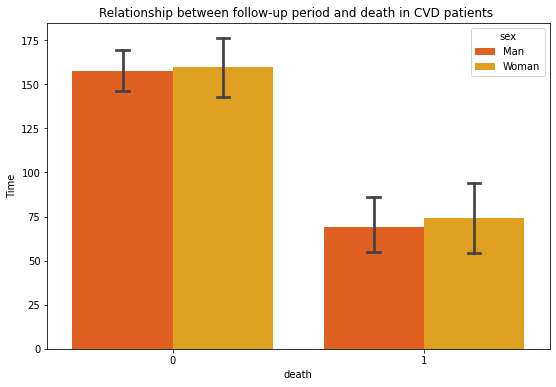

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(9,6))

# Add title
plt.title("Relationship between follow-up period and death in CVD patients ")

# Bar chart showing average arrival delay for SkyWest Airlines flights by month
sns.barplot(x=new_patients.death, y=new_patients.time, hue=new_patients.sex,capsize=.05,palette="autumn")

# Add label for vertical axis
plt.ylabel("Time");

Looking at the barplot, we can say that;
1. Patients with CVD survived even after with long follow up periods.
2. Few patients that specifically had earlier follow up periods couldn't survive.

Maybe the case who did not make it were too severe and hence their follow up period was less.



Question 4: Is there a link between diabetes, high blood pressure, and anemia in CVD patients?

In [ ]:
#Function to substitute boolean anaemia values in the new dataframe
def anemic(r):
  if r.anaemia == 1:
    return "Anemic"
  else:
    return "Normal"

In [ ]:
new_patients["anaemia"] = new_patients.apply(anemic,axis="columns")
new_patients.head(5)

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,Normal,582,0,20,True,265000.00,1.9,130,Man,non-smoker,4,1
1,55.0,Normal,7861,0,38,False,263358.03,1.1,136,Man,non-smoker,6,1
2,65.0,Normal,146,0,20,False,162000.00,1.3,129,Man,smoker,7,1
3,50.0,Anemic,111,0,20,False,210000.00,1.9,137,Man,non-smoker,7,1
4,65.0,Anemic,160,1,20,False,327000.00,2.7,116,Woman,non-smoker,8,1


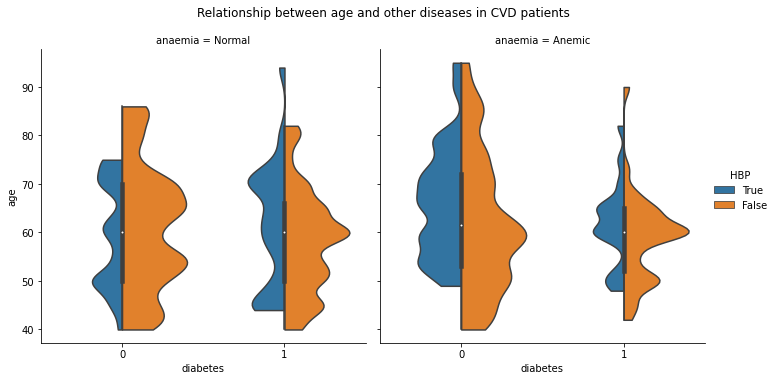

In [ ]:
g=sns.catplot(
    data=new_patients,
    x="diabetes",
    y="age",
    kind="violin",
    cut=0,
    hue="HBP",
    bw=0.2,
    scale="count",
    split=True,
    col="anaemia"
    )

g.fig.suptitle("Relationship between age and other diseases in CVD patients", y=1.05);

Considering patients without anaemia and diabetes:
1. The distribution of patients on the left side of violin plot show in the age range of 40-75 having HBP.  
2. Comparatively more patients in the age range of 40-85 do not have HBP.

Considering patients without anaemia but with diabetes:
1. The distribution of patients on the left side of violin plot show in the age range of 45-95 having HBP. The density of the patients seems to be higher than patients without diabetes.
2. Comparatively more patients in the age range of 40-80 do not have HBP.  

Considering patients with anaemia but without diabetes:
1. The distribution of patients on the left side of violin plot is denser than the previous plots and shows patients in the age range of 45-95 having HBP.
2. Comparatively more patients in the age range of 40-95 do not have HBP.

Considering patients with anaemia and diabetes:
1. The distribution of patients on the left side of violin plot is the least dense of the previous plots and shows patients in the age range of 48-82 having HBP.
2. Comparatively more patients in the age range of 42-95 do not have HBP.

Overall, there are more patients with diabetes and HBP than patients with all the three diseases.


Question 5: Is there a correlation between serum creatinine and platelet counts of CVD patients?

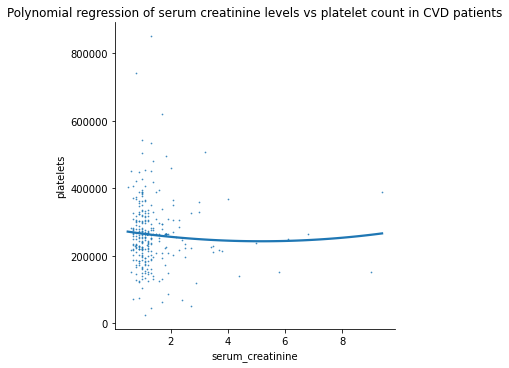

In [ ]:
# Polymonial regression plot
sns.lmplot(
    data=new_patients,
    x="serum_creatinine",
    y="platelets",
    order=2,
    ci=None,
    markers='.',
    scatter_kws={'s':2}
)
plt.title(
"Polynomial regression of serum creatinine levels vs platelet count in CVD patients"
);

In [ ]:
from scipy import stats
stats.linregress(new_patients.serum_creatinine,new_patients.platelets)

LinregressResult(slope=-3894.932134848713, intercept=268787.0957051535, rvalue=-0.04119807711256385, pvalue=0.47789094137369814, stderr=5481.202548625742)

Most data points lie in the creatinine range of below 2 and platelet count of 200000 and 400000. There are a few outliers that have platelet count of more than 400000. Some of the data points with higher creatinine levels have low platelet counts but some show high platelet count. Overall, we can say that as the creatinine levels increase, the platelet count decreases a little.

Question 6: How often do patients with the risk factors of CVD die?

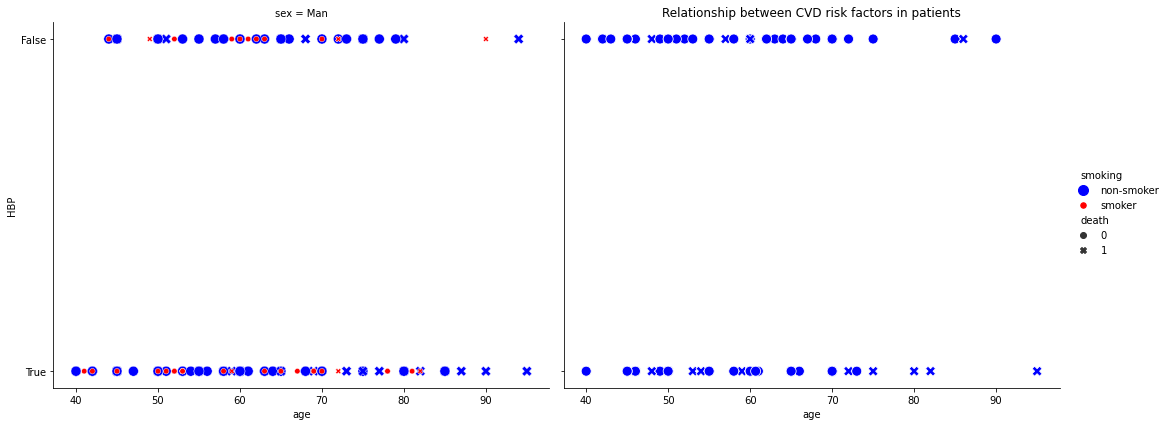

In [ ]:
sns.relplot(
    data=new_patients,
    x="age",
    y="HBP",
    col="sex",
    height=6,
    size="smoking",
    sizes=(30,100),
    hue="smoking",
    style="death",
    aspect=1.25,
    palette=["b", "r"]

)
plt.title("Relationship between CVD risk factors in patients");

* There are more men with HBP than without HBP.  
* The number of men having HBP seem to have a slightly higher death rate.
* The number of men who smoke are higher with HBP than without.
* The number of women having HBP seem to have a higher death rate than women without HBP.

So, HBP can be considered a more lethal factor than smoking for CVD.




**2. Creating a test set and a training set using the original dataset.**

In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   anaemia            299 non-null    int64  
 2   CPK                299 non-null    int64  
 3   diabetes           299 non-null    int64  
 4   ejection_fraction  299 non-null    int64  
 5   HBP                299 non-null    int64  
 6   platelets          299 non-null    float64
 7   serum_creatinine   299 non-null    float64
 8   serum_sodium       299 non-null    int64  
 9   sex                299 non-null    int64  
 10  smoking            299 non-null    int64  
 11  time               299 non-null    int64  
 12  death              299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#inspecting continuous variables
patients.describe()

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


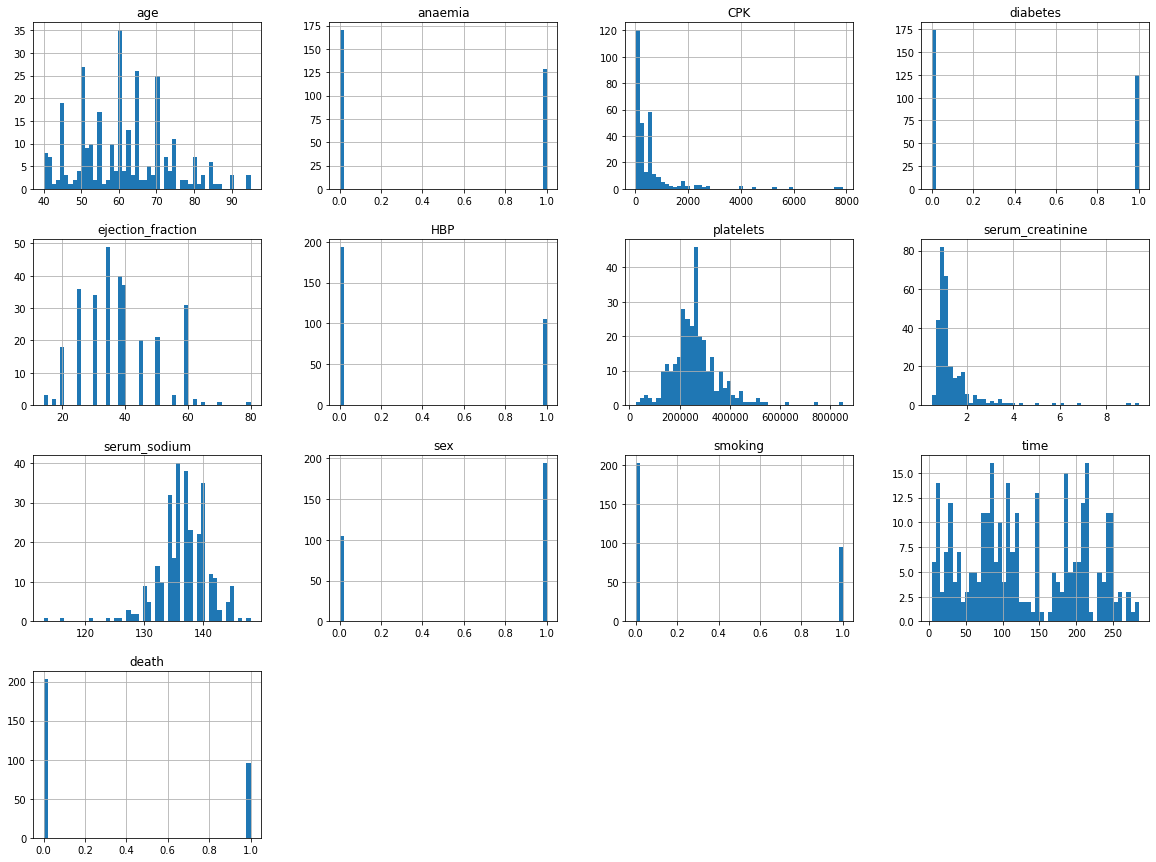

In [ ]:
#Plot distribution of continuous variables
%matplotlib inline
import matplotlib.pyplot as plt
patients.hist(bins = 50, figsize=(20,15))
plt.show()

In [ ]:
# Count missing values
patients.isnull().sum()

age                  0
anaemia              0
CPK                  0
diabetes             0
ejection_fraction    0
HBP                  0
platelets            0
serum_creatinine     0
serum_sodium         0
sex                  0
smoking              0
time                 0
death                0
dtype: int64

In [ ]:
# Count rows if any w/ missing values
patients[patients.isnull().any(axis=1)]

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death


In [ ]:
patients.age.unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# Create categorical age variable for stratified sampling
patients['age_cat'] = pd.cut(patients['age'],
                       bins=[0, 50, 60, 70, 90, np.inf],
                       labels=[1, 2, 3, 4, 5])

patients

,age,anaemia,CPK,diabetes,ejection_fraction,HBP,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death,age_cat
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,3
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,2
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,1


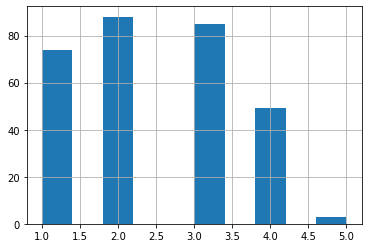

In [ ]:
# visualizing the age bins
patients["age_cat"].hist();

In [ ]:
# Use stratified sampling to create training and testing datasets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
splitidx = split.split(patients, patients['age_cat'])

for train_index, test_index in split.split(patients, patients['age_cat']):
    print(train_index, test_index)
    print(len(train_index), len(test_index))
    strat_train_set = patients.loc[train_index]
    strat_test_set = patients.loc[test_index]

[ 28 184  67 251 197 130 147 249  34 120 178 228  53 292   4 275  16 254
  58  57 276 289 252 212 285 191 255 143 169  56 174 198 209  41 115 104
 136 164  82  88  91 148  20 287  39 236 114  49 135  31 121 140  90 270
 106 200 166 101 282 133 278  29  76  95 215  65 244  15 242  99 258 154
 204 167 203 231 243  79 257 145 210 264 146  11  84 261  30 111 122 199
 165  26 168  54  72 241 126 155 262  17 152  61 163 123  94  50 226  44
 100 202  48 280  68 157   9 171 158 128 109 132 177 269  35 201 266 185
 187  83 229 295 141  85 151 206 294  23 195  19   7 105  43  18 176  38
 217 110  81 117 291 279 124  69 181 253  22   6  75 180  63  60 160 259
  45  74 245 139 134  33  77  32  42 240 237  37 113 172 239 218  71 288
  92  86 144  73 156  55 153 125 268 211 116 179  80 138 238 159 277 225
 219 188 235 260 196 223 271 230 298 233 232  78  96 250  66 220 186   3
  21 297 170 118  40 234 192 131 205 290  24 190 248 161 216 189 127 207
  14 108  70  52 102] [273 274 107 173  12 286 103 

**3. Preparing the data and pipeline for training a few ML classifiers that can predict a binary outcome (survive or dead). Using N-fold cross-validation to evaluate the performance of each classifier.**

In [ ]:
# Compare it to random sampling
train_set, test_set = train_test_split(patients, test_size=0.2, random_state=42)

def get_cat_proportions(data):
    return data['age_cat'].value_counts() / len(data)

compare_props = pd.DataFrame({
    'Overall': get_cat_proportions(patients),
    'Stratified': get_cat_proportions(strat_test_set),
    'Random': get_cat_proportions(test_set),
}).sort_index()
compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.247492,0.250000,0.300000,21.216216,1.013514
2,0.294314,0.300000,0.266667,-9.393939,1.931818
3,0.284281,0.283333,0.283333,-0.333333,-0.333333
4,0.163880,0.166667,0.150000,-8.469388,1.700680
5,0.010033,0.000000,0.000000,-100.000000,-100.000000


In [ ]:
# Remove attribute so that the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('age_cat', axis=1, inplace=True)

patients = strat_train_set.drop('death', axis=1)  # drop labels for training set
patient_labels = strat_train_set['death'].copy()

In [ ]:
#Looking for correlations
corr_matrix = patients.corr()

In [ ]:
corr_matrix["CPK"].sort_values(ascending=False)

CPK                  1.000000
sex                  0.074427
serum_sodium         0.064174
smoking              0.032494
diabetes             0.032298
time                 0.024143
serum_creatinine     0.021189
platelets            0.011047
age                 -0.017287
ejection_fraction   -0.040616
HBP                 -0.059825
anaemia             -0.190806
Name: CPK, dtype: float64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),  # feature scaling
    ])

patient_prepared = num_pipeline.fit_transform(patients)

In [ ]:
patient_prepared

array([[-0.24070344,  1.17898261, -0.56438568, ...,  0.78413319,
        -0.68283063, -1.38326846],
       [-0.24070344,  1.17898261, -0.46648455, ...,  0.78413319,
         1.46449201,  0.53372306],
       [ 0.92766155,  1.17898261, -0.50679678, ...,  0.78413319,
         1.46449201, -0.86408326],
       ...,
       [-1.65943236, -0.84818893, -0.46302922, ...,  0.78413319,
         1.46449201, -0.82414593],
       [-0.07379416, -0.84818893,  3.93215568, ..., -1.27529355,
        -0.68283063, -1.15695696],
       [ 1.59529869, -0.84818893,  0.40080429, ...,  0.78413319,
         1.46449201, -0.57120955]])

In [ ]:
from sklearn.linear_model import LinearRegression

# train a linear regression model with our training data
lin_reg = LinearRegression()
lin_reg.fit(patient_prepared, patient_labels)

LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = patients.iloc[:5]
some_labels = patient_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [0.96495969 0.29327567 0.60776381 0.07426965 0.21791494]


In [ ]:
print("Labels:", list(some_labels))

Labels: [1, 1, 1, 0, 0]


Checking the performance of each model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', max_iter=1000)
clf = lr.fit(patient_prepared,patient_labels)
scores = cross_val_score(clf, patient_prepared, patient_labels, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logistic Regression Accuracy: 0.82 (+/- 0.16)


In [ ]:
from sklearn import svm
SVM = svm.LinearSVC(max_iter=10000).fit(patient_prepared, patient_labels)
scores = cross_val_score(SVM, patient_prepared, patient_labels, cv=10)
print("SVM Linear Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVM Linear Accuracy: 0.82 (+/- 0.16)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(patient_prepared, patient_labels)
scores = cross_val_score(RF, patient_prepared, patient_labels, cv=5)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random Forest Classifier Accuracy: 0.83 (+/- 0.08)


Fine tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clas = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_cls, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(patient_prepared, patient_labels)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5052911526399114 {'max_features': 2, 'n_estimators': 3}
0.46184182610545954 {'max_features': 2, 'n_estimators': 10}
0.4190710767589271 {'max_features': 2, 'n_estimators': 30}
0.4708713817551757 {'max_features': 4, 'n_estimators': 3}
0.43393302748284274 {'max_features': 4, 'n_estimators': 10}
0.42432675085287946 {'max_features': 4, 'n_estimators': 30}
0.45292587028302017 {'max_features': 6, 'n_estimators': 3}
0.4042109904773682 {'max_features': 6, 'n_estimators': 10}
0.39331740561572365 {'max_features': 6, 'n_estimators': 30}
0.4242222754725312 {'max_features': 8, 'n_estimators': 3}
0.3988013956739487 {'max_features': 8, 'n_estimators': 10}
0.3882128538033691 {'max_features': 8, 'n_estimators': 30}
0.46642597643073197 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.44353112422470237 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.46661600535547504 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.42920840876668337 {'bootstrap': False, 'max_feature

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06671041, 0.01388907, 0.08431332, 0.0108956 , 0.09702873,
       0.00587384, 0.08358515, 0.13120349, 0.05791761, 0.00723147,
       0.00501852, 0.4363328 ])

In [ ]:
# Examine the best estimator that grid search returned
print(grid_search.best_params_)
grid_search.best_estimator_

{'max_features': 8, 'n_estimators': 30}


RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("death", axis=1)
y_test = strat_test_set["death"].copy()

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

**4. Creating two plots (ROC and precision-recall curve) showing all the trained ML classifier's performances.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

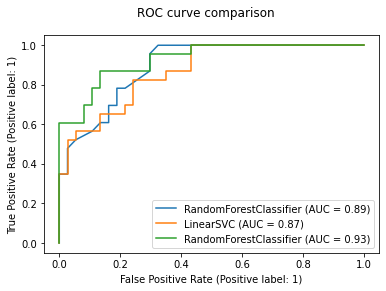

In [ ]:
# Plot the ROC curve to compare the performance of the few
# ML Classifier that we tried
from sklearn import metrics
from sklearn.metrics import plot_roc_curve


lrc_disp = plot_roc_curve(final_model, X_test_prepared, y_test)
svc_disp = plot_roc_curve(SVM, X_test_prepared, y_test, ax=lrc_disp.ax_)
rfc_disp = plot_roc_curve(RF, X_test_prepared, y_test, ax=lrc_disp.ax_)

lrc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

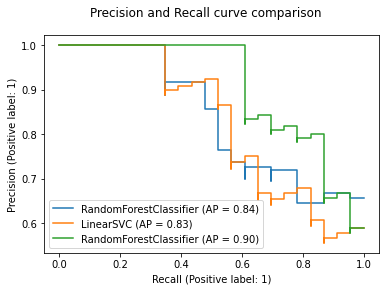

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

lrc_disp = plot_precision_recall_curve(final_model, X_test_prepared, y_test)
svc_disp = plot_precision_recall_curve(SVM, X_test_prepared, y_test, ax=lrc_disp.ax_)
rfc_disp = plot_precision_recall_curve(RF, X_test_prepared, y_test, ax=lrc_disp.ax_)

lrc_disp.figure_.suptitle('Precision and Recall curve comparison')

plt.show()

In the above plots, the pip is installed properly but still gives a warning.

As Random Forest Classifier shows slightly high accuracy, we will use it as a model to train and test our data.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

forest_cls = RandomForestClassifier(n_estimators=10, random_state=42)
forest_cls.fit(patient_prepared, patient_labels)
predictions = forest_cls.predict(patient_prepared)
forest_mse = mean_squared_error(patient_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.06468462273531508

In [ ]:
forest_scores = cross_val_score(forest_cls, patient_prepared, patient_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([0.20412415, 0.5       , 0.35355339, 0.28867513, 0.35355339,
       0.54006172, 0.5       , 0.35355339, 0.35355339, 0.51075392])

**5. Testing the best ML classifier using the test set.**

In [ ]:
final_rmse

0.5

In [ ]:
print("Accuracy of the random forest classifier model with test data:",
      round(final_model.score(X_test_prepared, y_test),4))

Accuracy of the random forest classifier model with test data: 0.75


From the above test result, we cannot really say if the patient survived or died.

Confusion matrix showing the performance of the best class ML classifier.

Confusion Matrix:
[[31  6]
 [ 9 14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


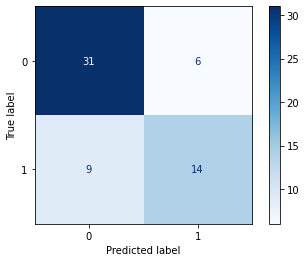

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.70      0.61      0.65        23

    accuracy                           0.75        60
   macro avg       0.74      0.72      0.73        60
weighted avg       0.75      0.75      0.75        60



In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, final_predictions, labels=[0,1]))
plot_confusion_matrix(final_model, X_test_prepared, y_test, cmap="Blues", values_format = '.0f')
plt.show()
# Printing the precision and recall, among other metrics
print("------------------------------------------------------")
print(metrics.classification_report(y_test, final_predictions, labels=[0,1]))